In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
traindf = pd.read_csv(r'Downloads/house.csv')
testdf = pd.read_csv(r'Downloads/housetest.csv')

In [3]:
traindf.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
highcorr = pd.Series.sort_values(traindf.corrwith(traindf.SalePrice))
highcorr

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
dtype: float

In [5]:
#highcorr = pd.Series.sort_values(traindf.corrwith(traindf.SalePrice)).keys()
#highcorr

In [6]:
highcorr = traindf.corr()
feature = highcorr.index[abs(highcorr['SalePrice'])>.6]
feature

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')

In [7]:
df = pd.concat([traindf,testdf])
df.shape

(2919, 81)

In [8]:
def core(dataset,threshold):
    col = set()
    cormatrix = dataset.corr()
    for i in range(len(cormatrix.columns)):
     for j in range(i):
        if abs(cormatrix.iloc[i,j])>threshold:
             colname = cormatrix.columns[i]
             col.add(colname)
    return col

In [9]:
corrfeature = core(df,.8)
corrfeature

{'1stFlrSF', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'}

In [10]:
AR= ['1stFlrSF', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd']
df1 =df.drop(columns = AR,axis =1)

In [11]:
df1.head(6)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal   208500.0  
1      5   2007        WD         Normal   181500.0  
2      9   2008        WD         Normal   223500.0  
3      2   2006        WD        Abnorml   140000.0  
4     12   2008        WD         Normal   250000.0  
5     10   2009        WD         Normal   143000.0  

[6 rows x 77 columns]

In [12]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df1.head(6)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   
5          GLQ       732.0          Unf         0.0       64.0        796.0   

  Heating HeatingQC CentralAir Electrical  2ndFlrSF  LowQualFinSF  GrLivArea  \
0    GasA        Ex          Y      SBrkr       854             0       1710   
1    GasA        Ex          Y      SBrkr         0             0       1262   
2    GasA        Ex          Y      SBrkr       866             0       1786   
3    GasA        Gd          Y      SBrkr       756             0       1717   
4    GasA        Ex          Y      SBrkr      1053             0       2198   
5    GasA        Ex          Y      SBrkr       566             0       1362   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0           0.0         2         1             3             1   
1           0.0           1.0         2         0             3             1   
2           1.0           0.0         2         1 

In [13]:
miss = df1.isnull().mean()
miss

Id               0.000000
MSSubClass       0.000000
MSZoning         0.001370
LotFrontage      0.166495
LotArea          0.000000
Street           0.000000
Alley            0.932169
LotShape         0.000000
LandContour      0.000000
Utilities        0.000685
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000343
Exterior2nd      0.000343
MasVnrType       0.008222
MasVnrArea       0.007879
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.027749
BsmtCond         0.028092
BsmtExposure     0.028092
BsmtFinType1     0.027064
BsmtFinSF1       0.000343
BsmtFinType2     0.027407
BsmtFinSF2       0.000343
BsmtUnfSF        0.000343
TotalBsmtSF 

In [14]:
#arr = miss[miss>48].keys()
#arr

In [15]:
arr1 = ['Alley']
df2 = df1.drop(columns = arr1)

df2.shape

(2919, 76)

In [16]:
import calendar
df2['MoSold'] = df2['MoSold'].apply(lambda x:calendar.month_abbr[x])

In [17]:
yearvar = [var for var in df2 if 'Yr' in var or 'Year' in var ]
yearvar

['YearBuilt', 'YearRemodAdd', 'YrSold']

In [18]:
yearvar =['YearBuilt', 'YearRemodAdd','YrSold','MoSold' ]
for var in yearvar:
    df2[var] = df2[var].astype(str)

In [19]:
df3 = df2.drop(columns = ['SalePrice'] ,axis = 1)
y = df2['SalePrice']

In [20]:
df3.shape

(2919, 75)

In [21]:
df3.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond YearBuilt YearRemodAdd RoofStyle  \
0     2Story            7            5      2003         2003     Gable   
1     1Story            6            8      1976         1976     Gable   
2     2Story            7            5      2001         2002     Gable   
3     2Story            7            5      1915         1970     Gable   
4     2Story            8            5      2000         2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          Y      SBrkr       854             0       1710           1.0   
1          Y      SBrkr         0             0       1262           0.0   
2          Y      SBrkr       866             0       1786           1.0   
3          Y      SBrkr       756             0       1717           1.0   
4          Y      SBrkr      1053             0       2198           1.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0           0.0         2         1             3             1          Gd   
1           1.0         2         0             3             1          TA   
2           0.0         2         1             3             1          Gd   
3           0.0         1         0             3             1          Gd   
4           0.0         2         1             4             1          Gd   

  Functional  Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  \
0        Typ           0         NaN     Attchd          RFn         2.0   
1        Typ           1          TA     Attchd          RFn         2.0   
2        Typ           1          TA     Attchd          RFn         2.0   
3      

In [22]:
numer = df3.select_dtypes(['int64','float64'])
numer.head(6)


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0   1          60         65.0     8450            7            5       196.0   
1   2          20         80.0     9600            6            8         0.0   
2   3          60         68.0    11250            7            5       162.0   
3   4          70         60.0     9550            7            5         0.0   
4   5          60         84.0    14260            8            5       350.0   
5   6          50         85.0    14115            5            5         0.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  LowQualFinSF  \
0       706.0         0.0      150.0        856.0       854             0   
1       978.0         0.0      284.0       1262.0         0             0   
2       486.0         0.0      434.0        920.0       866             0   
3       216.0         0.0      540.0        756.0       756             0   
4       655.0         0.0      490.0       1145.0      1053             0   
5       732.0         0.0       64.0        796.0       566             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   
5       1362           1.0           0.0         1         1             1   

   KitchenAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  \
0             1           0         2.0           0           61   
1             1           1         2.0         298            0   
2             1           1         2.0           0           42   
3             1           1         3.0           0           35   
4             1           1         3.0         192           84   
5             1           0         2.0          40           30   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  
0              0          0            0         0        0  
1              0          0            0         0        0  
2              0          0            0         0        0  
3            272          0            0         0        0  
4              0          0            0         0        0  
5              0        320            0         0      700

In [23]:
numerfill = [var for var in numer if numer[var].isnull().sum()>0]
numerfill

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars']

In [24]:
## filling missing value with the same name 
def whole(df,var):
    #mean = df[var].mean()
    #median = df[var].median()
    extreme = df[var].mean()+3*df[var].std()
    #randomsample = df[var].dropna().sample(df[var].isnull().sum(),random_state = 0)
    #df[var]= df[var].fillna(median)
    df[var] = df[var].fillna(extreme)
    #df[var+'rand']  = df[var]
   # randomsample.index = df[df[var].isnull()].index
    #df.loc[df[var].isnull(),var+'rand'] = randomsample
    

In [25]:
for var in numerfill :
 whole(df3,var)
df3[numerfill].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageCars      0
dtype: int64

In [26]:
desvar = [var for var in numer if len(df3[var].unique())< 25 ]
desvar

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'PoolArea']

In [27]:
continous = [var for var in numer if var not in desvar and var not in yearvar + ['Id']]
continous

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

In [28]:
def fighist(df,var):
     df[var].hist(bins = 20)

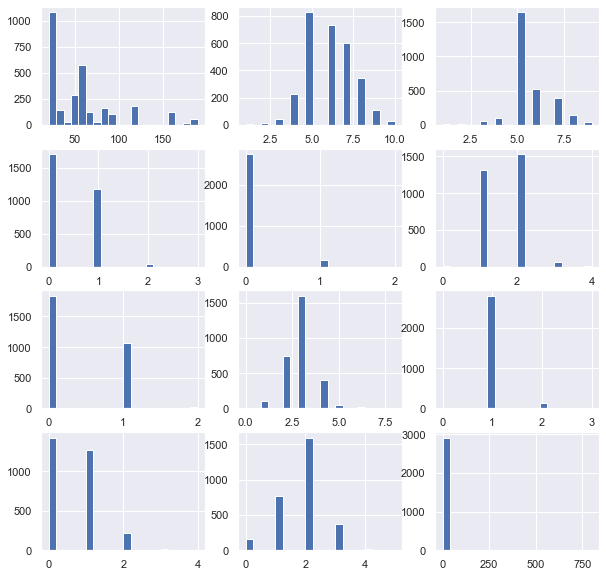

In [29]:
plt.figure(figsize = (10,10))
sns.set()
for i,var in enumerate (desvar):
    plt.subplot(4,3,i+1)
    fighist(df3,var)

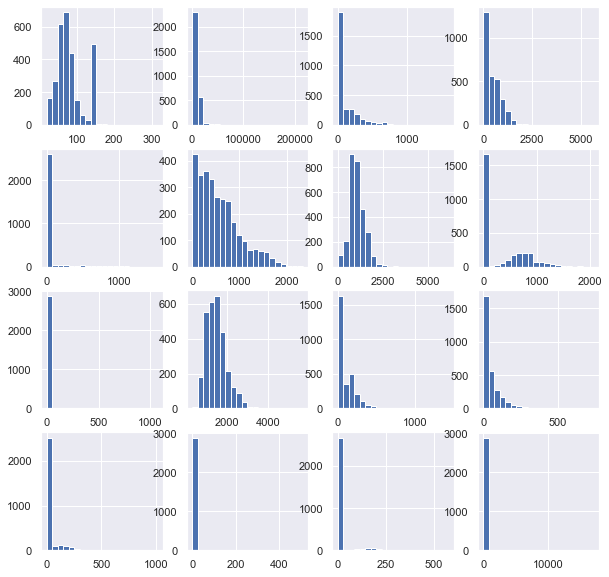

In [30]:
plt.figure(figsize = (10,10))
sns.set()
for i,var in enumerate (continous):
    plt.subplot(4,4,i+1)
    fighist(df3,var)

In [31]:
import scipy.stats as stat
import pylab
def pltdata(df,var):
    plt.figure(figsize = (5,4))
    plt.subplot(1,2,1)
    df[var].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[var],dist = 'norm',plot = pylab)
    

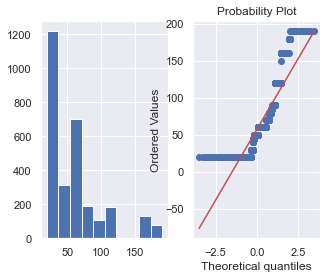

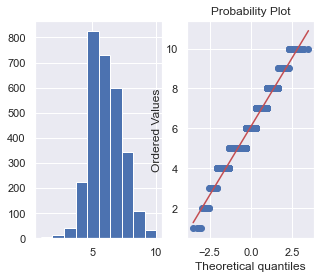

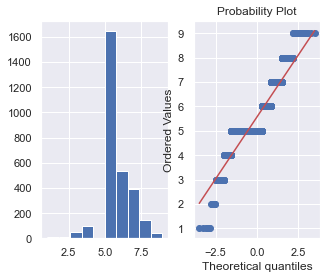

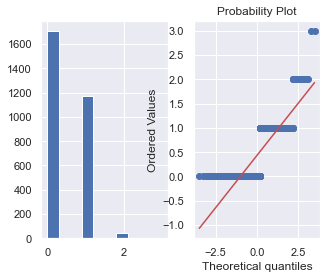

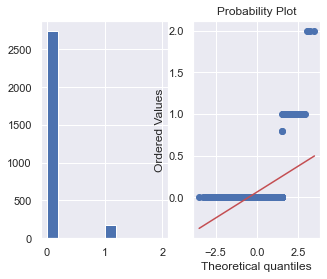

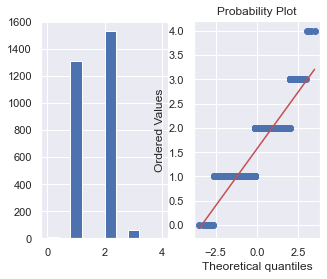

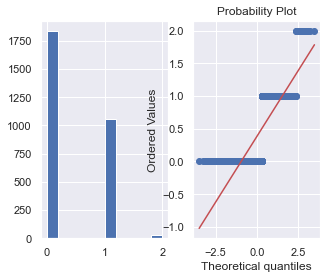

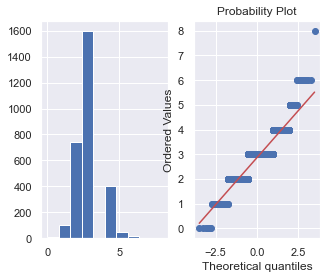

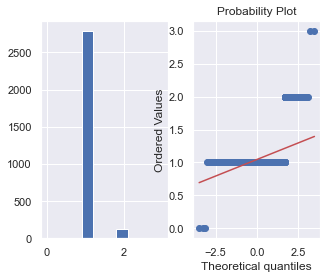

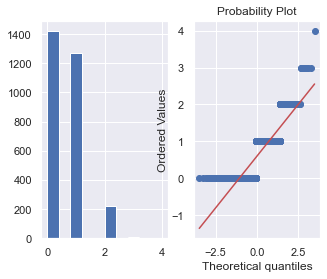

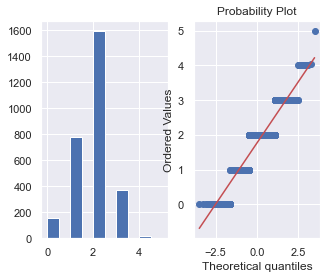

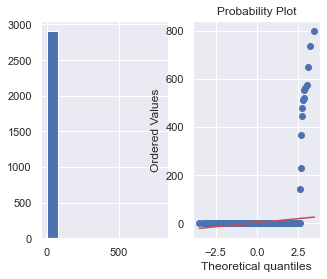

In [32]:
for i,var in enumerate(desvar):
    
    pltdata(df3,var)

In [33]:
### check QQ plot for coninous before transformation 

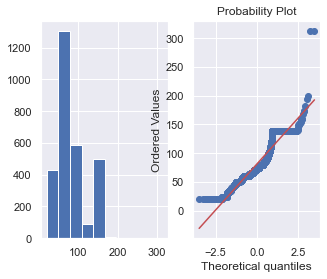

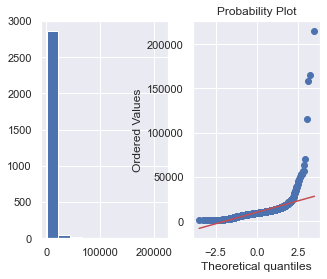

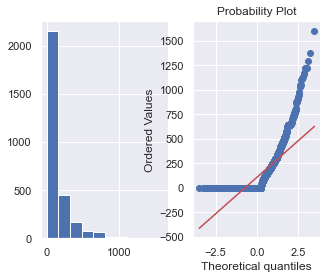

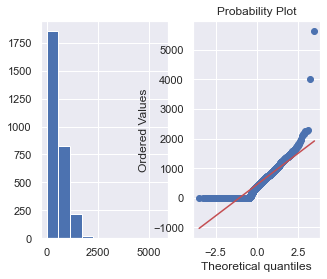

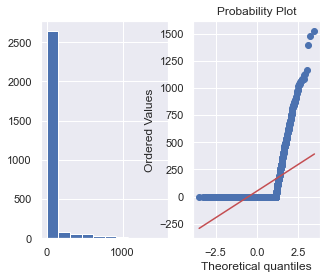

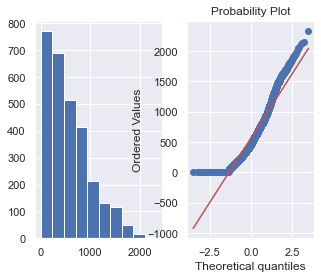

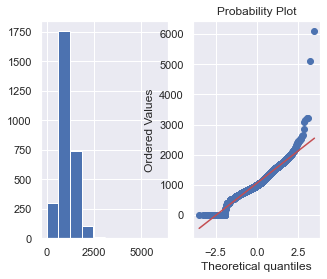

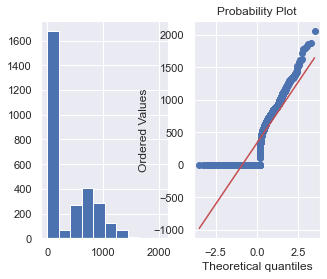

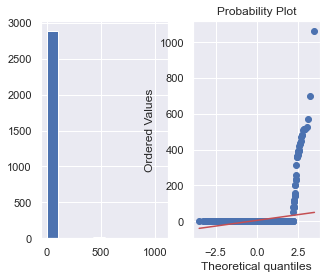

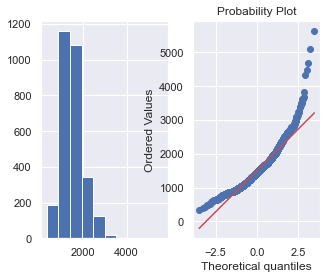

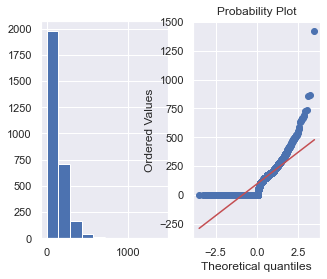

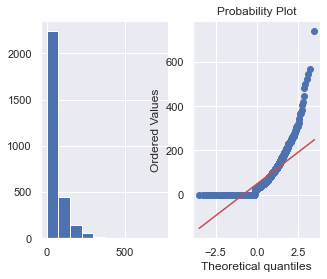

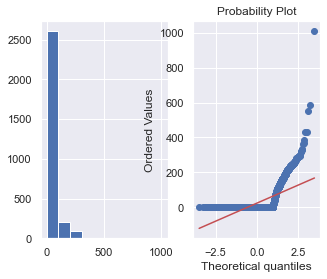

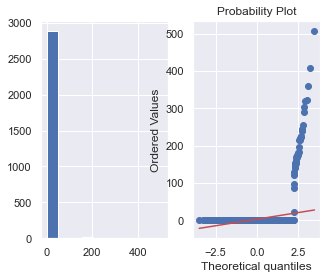

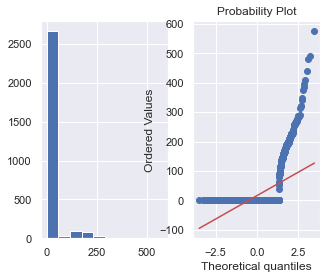

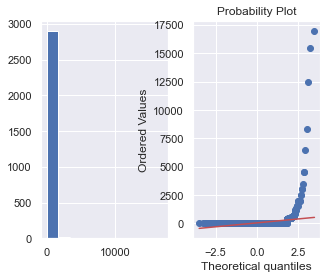

In [34]:
for i,var in enumerate(continous):
    
    pltdata(df3,var)

In [35]:
### now do transformation of continous.. logrithimic transformation

In [36]:
def logtran(df,var):
    df[var] = np.log(df[var])

In [37]:
for var in continous:
    if 0 in df3[var].unique():
        pass
    else:
        logtran(df3,var)

In [38]:
### again see their QQ plot

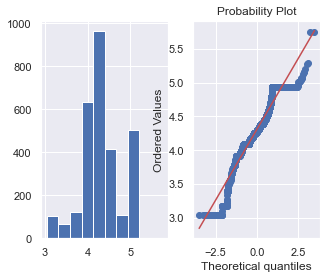

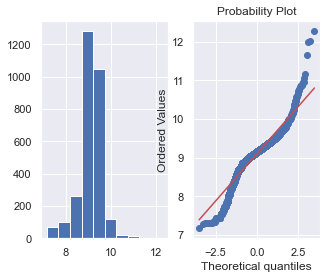

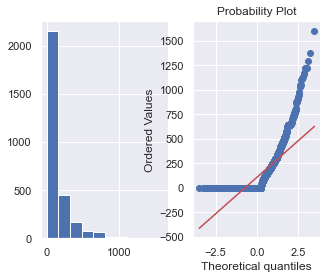

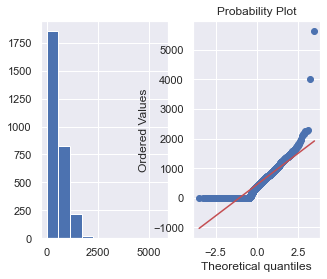

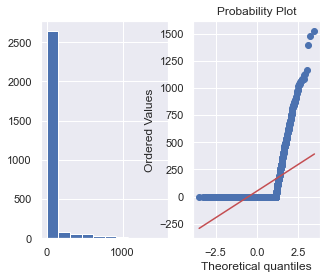

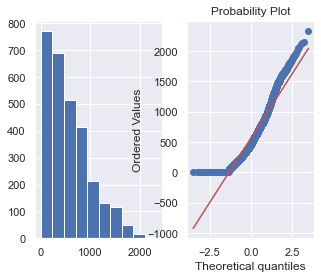

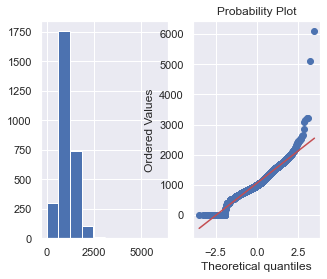

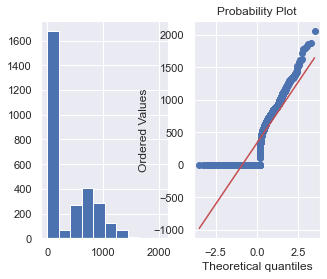

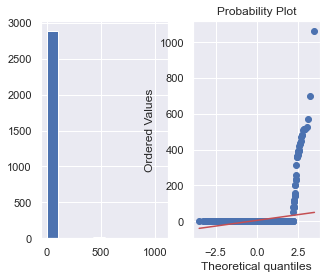

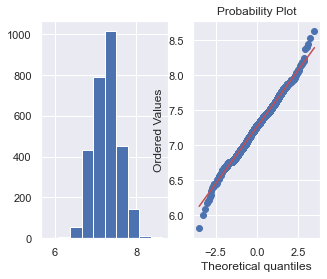

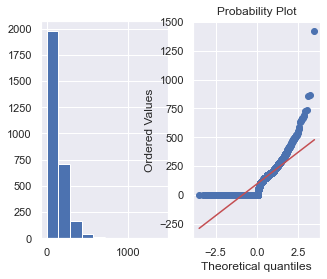

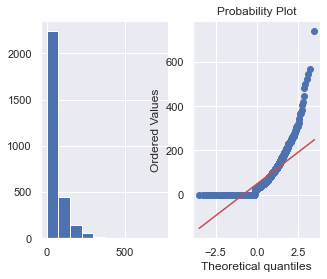

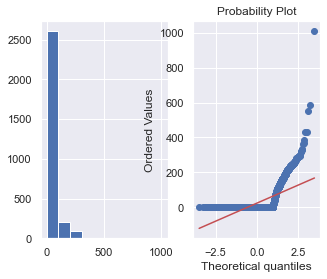

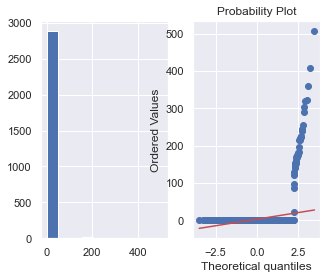

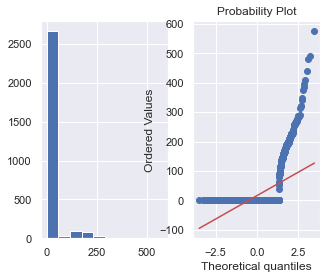

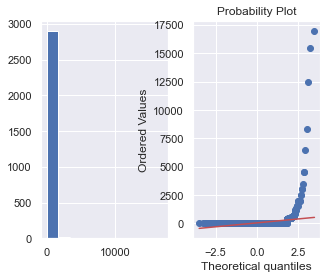

In [39]:
for i,var in enumerate(continous):
    
    pltdata(df3,var)

In [40]:
##its time to work on outliers

In [41]:
import warnings 
warnings.filterwarnings('ignore')

In [42]:
def fig(df,var):
   sns.boxplot(var,data = df)

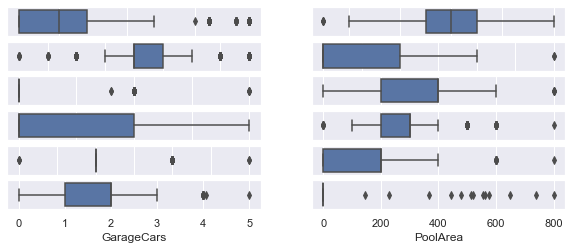

In [43]:
plt.figure(figsize = (10,5))
sns.set()
for i,var in enumerate (desvar):
    plt.subplot(8,2,i+1)
    fig(df3,var)

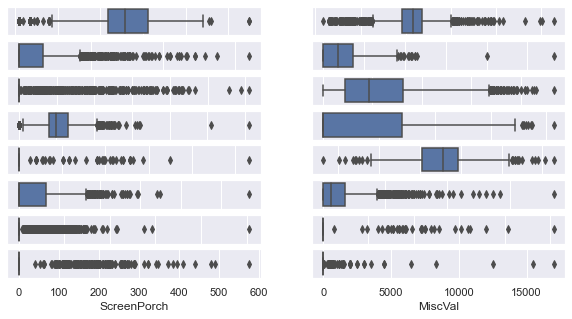

In [44]:
plt.figure(figsize = (10,5))
sns.set()
for i,var in enumerate (continous):
    plt.subplot(8,2,i+1)
    fig(df3,var)

In [45]:
#outliers

In [46]:
def disc(df,var):
 upper=df[var].mean()+3*df[var].std()
 lower = df[var].mean()-3*df[var].std()
 df3.loc[df[var]>=upper,var]=upper
 print(upper)

In [47]:
for var in desvar:
    disc(df3,var)

184.6906018841621
10.318913219707056
8.903969149813822
2.0094858548508014
0.8009465867000769
3.2269105194269514
1.8888820155068438
5.3283054068452556
1.687921803601941
2.535510379026954
4.055405458832679
109.24363645761233


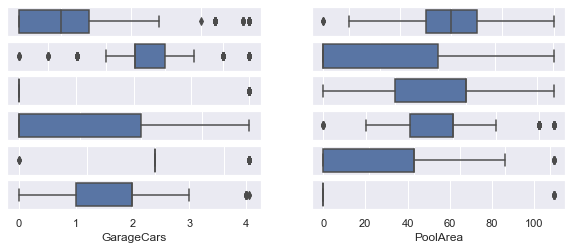

In [48]:
plt.figure(figsize = (10,5))
sns.set()
for i,var in enumerate (desvar):
    plt.subplot(8,2,i+1)
    fig(df3,var)

In [49]:
def continu(df2,var):
  upper=df[var].mean()+3*df[var].std()
  lower = df[var].mean()-3*df[var].std()
  iqr = df[var].quantile(.75) -df[var].quantile(.25)
  lbd = df[var].quantile(.25)-(iqr*3)
  ubd = df[var].quantile(.75)+(iqr*3)
  df3.loc[df[var]>=ubd,var]=ubd
  print(upper)
  print(lower)
  print(iqr)
  print (lbd)
  print(ubd)

In [50]:
for var in continous:
    continu(df2,var)

139.34050943520882
-0.7289188063555514
21.0
-4.0
143.0
33829.10315748105
-13492.874997152168
4092.0
-4798.0
23846.0
640.2040712679877
-435.80144695859553
164.0
-492.0
656.0
1808.2557127034047
-925.4092425183463
733.0
-2199.0
2932.0
557.199081415087
-458.0345851847923
0.0
0.0
0.0
1879.4030824512652
-757.8588740893734
585.5
-1536.5
2562.0
2374.0763617364373
-270.5211869591924
509.0
-734.0
2829.0
1622.588093858205
-949.6206392504627
704.0
-2112.0
2816.0
143.88488944537733
-134.49605765366783
0.0
0.0
0.0
3018.912984618467
-17.39328609157451
617.5
-726.5
3596.0
473.289600065723
-285.8699357971378
168.0
-504.0
672.0
250.21329072662806
-155.23966962351054
70.0
-210.0
280.0
215.83105812082306
-169.63441543497174
0.0
0.0
0.0
78.16676904179317
-72.96224694518475
0.0
0.0
0.0
184.615445451986
-152.49074521217787
0.0
0.0
0.0
1753.0325994477323
-1651.3806638533508
0.0
0.0
0.0


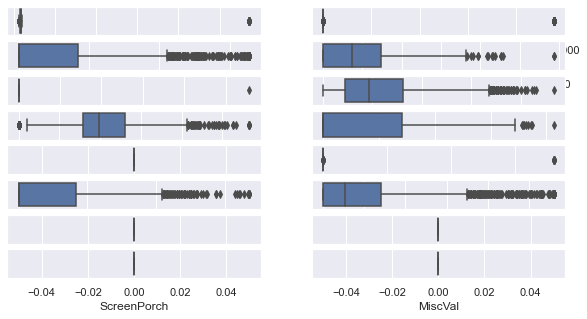

In [51]:
plt.figure(figsize = (10,5))
sns.set()
for i,var in enumerate (continous):
    plt.subplot(8,2,i+1)
    fig(df3,var)

In [52]:
df3.shape
df3.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0   1        60.0       RL     4.174387  9.041922   Pave      Reg         Lvl   
1   2        20.0       RL     4.382027  9.169518   Pave      Reg         Lvl   
2   3        60.0       RL     4.219508  9.328123   Pave      IR1         Lvl   
3   4        70.0       RL     4.094345  9.164296   Pave      IR1         Lvl   
4   5        60.0       RL     4.430817  9.565214   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond YearBuilt YearRemodAdd RoofStyle  \
0     2Story          7.0          5.0      2003         2003     Gable   
1     1Story          6.0          8.0      1976         1976     Gable   
2     2Story          7.0          5.0      2001         2002     Gable   
3     2Story          7.0          5.0      1915         1970     Gable   
4     2Story          8.0          5.0      2000         2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          Y      SBrkr       854             0   7.444249           1.0   
1          Y      SBrkr         0             0   7.140453           0.0   
2          Y      SBrkr       866             0   7.487734           1.0   
3          Y      SBrkr       756             0   7.448334           1.0   
4          Y      SBrkr      1053             0   7.695303           1.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0      0.000000       2.0       1.0           3.0           1.0          Gd   
1      0.800947       2.0       0.0           3.0           1.0          TA   
2      0.000000       2.0       1.0           3.0           1.0          Gd   
3      0.000000       1.0       0.0           3.0           1.0          Gd   
4      0.000000       2.0       1.0           4.0           1.0          Gd   

  Functional  Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  \
0        Typ         0.0         NaN     Attchd          RFn         2.0   
1        Typ         1.0          TA     Attchd          RFn         2.0   
2        Typ         1.0          TA     Attchd          RFn         2.0   
3

In [53]:
catvar = df3.select_dtypes(include = 'object')
catvar.head()


MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle YearBuilt  \
0      CollgCr       Norm       Norm     1Fam     2Story      2003   
1      Veenker      Feedr       Norm     1Fam     1Story      1976   
2      CollgCr       Norm       Norm     1Fam     2Story      2001   
3      Crawfor       Norm       Norm     1Fam     2Story      1915   
4      NoRidge       Norm       Norm     1Fam     2Story      2000   

  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0         2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1         1976     Gable  CompShg     MetalSd     MetalSd       None   
2         2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3         1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4         2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        Gd        TA      PConc       Gd       TA           No          GLQ   
1        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3        TA        TA     BrkTil       TA       Gd           No          ALQ   
4        Gd        TA      PConc       Gd       TA           Av          GLQ   

  BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0          Unf    GasA        Ex          Y      SBrkr          Gd        Typ   
1          Unf    GasA        Ex          Y      SBrkr          TA        Typ   
2          Unf    GasA        Ex          Y      SBrkr          Gd        Typ   
3          Unf    GasA        Gd          Y      SBrkr          Gd        Typ   
4          Unf    GasA        Ex          Y      SBrkr          Gd        Typ   

  FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive PoolQC  \
0         NaN     Attchd          RFn         TA         TA          Y    NaN   
1          TA     Attchd          RFn         TA         TA          Y    NaN   
2          TA     Attchd          RFn         TA         TA          Y    NaN   
3          Gd     Detchd          Unf         TA         TA          Y    NaN   
4          TA     Attchd          RFn         TA         TA          Y    NaN   

  Fence MiscFeature MoSold YrSold SaleType SaleCondition  
0   NaN         NaN    Feb   2008       WD        Normal  
1   NaN         NaN    May   2007       WD        Normal  
2   NaN         NaN    Sep   2008       WD        Normal  
3   NaN         NaN    Feb   2006       WD       Abnorml  
4   NaN         NaN    Dec   2008       WD        Normal

In [54]:
catnullrows = catvar[catvar. isnull().any(axis= 1)]
catnullrows

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
7          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
8          RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
9          RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
10         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
11         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
12         RL   Pave      IR2         Lvl    AllPub    Inside       Gtl   
13         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
14         RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
15         RM   Pave      Reg         Lvl    AllPub    Corner       Gtl   
16         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
17         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
18         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
19         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
20         RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
21         RM   Pave      Reg         Bnk    AllPub    Inside       Gtl   
22         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
23         RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
24         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
25         RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
26         RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
27         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
28         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
29         RM   Pave      IR1         Lvl    AllPub    Inside       Gtl   
30    C (all)   Pave      Reg         Lvl    AllPub    Inside       Gtl   
31         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
32         RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
33         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
34         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
35         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
36         RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
37         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
38         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
39         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
40         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
41         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
42         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
43         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
44         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
45         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
46         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
47         FV   Pave      Reg         Lvl    AllPub    Inside       Gtl   
48         RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
49         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
50         RL   Pave      IR2         Lvl    AllPub    Corner       Gtl   
51         RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
52         RM   Grvl      IR2 

# null values ko handle karne ke ways jaise dropna, rows ko khatm kar dega lekin ye efficent nahi hai. uske baad mode value, matlb most frequent ko fill karo ye data ko imbalnce kar dega. sbse sahi hai classifier algorithm se fill karna jo ki mujhe aata nhi hai aur uske baad unsupervised se fill karna ye bhi mujhe aata nahi hai. 

In [55]:
catvarfill = [var for var in catvar if catvar[var] .isnull().sum()>0]
catvarfill

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [56]:
for var in catvarfill:
   catvar[var].fillna(catvar[var].mode()[0], inplace = True)
   print(var,'=',catvar[var].mode()[0] )


MSZoning = RL
Utilities = AllPub
Exterior1st = VinylSd
Exterior2nd = VinylSd
MasVnrType = None
BsmtQual = TA
BsmtCond = TA
BsmtExposure = No
BsmtFinType1 = Unf
BsmtFinType2 = Unf
Electrical = SBrkr
KitchenQual = TA
Functional = Typ
FireplaceQu = Gd
GarageType = Attchd
GarageFinish = Unf
GarageQual = TA
GarageCond = TA
PoolQC = Ex
Fence = MnPrv
MiscFeature = Shed
SaleType = WD


In [57]:
df3.update(catvar)
df3.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
Functional  

# years, months , weekdays ye sb ka apna ek order hai jo ki predifine hai to inko ordinal encoder denge 

In [58]:
df3['SalePrice'] = y
df3.head(5)

Id  MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0   1        60.0       RL     4.174387  9.041922   Pave      Reg         Lvl   
1   2        20.0       RL     4.382027  9.169518   Pave      Reg         Lvl   
2   3        60.0       RL     4.219508  9.328123   Pave      IR1         Lvl   
3   4        70.0       RL     4.094345  9.164296   Pave      IR1         Lvl   
4   5        60.0       RL     4.430817  9.565214   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond YearBuilt YearRemodAdd RoofStyle  \
0     2Story          7.0          5.0      2003         2003     Gable   
1     1Story          6.0          8.0      1976         1976     Gable   
2     2Story          7.0          5.0      2001         2002     Gable   
3     2Story          7.0          5.0      1915         1970     Gable   
4     2Story          8.0          5.0      2000         2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          Y      SBrkr       854             0   7.444249           1.0   
1          Y      SBrkr         0             0   7.140453           0.0   
2          Y      SBrkr       866             0   7.487734           1.0   
3          Y      SBrkr       756             0   7.448334           1.0   
4          Y      SBrkr      1053             0   7.695303           1.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0      0.000000       2.0       1.0           3.0           1.0          Gd   
1      0.800947       2.0       0.0           3.0           1.0          TA   
2      0.000000       2.0       1.0           3.0           1.0          Gd   
3      0.000000       1.0       0.0           3.0           1.0          Gd   
4      0.000000       2.0       1.0           4.0           1.0          Gd   

  Functional  Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  \
0        Typ         0.0          Gd     Attchd          RFn         2.0   
1        Typ         1.0          TA     Attchd          RFn         2.0   
2        Typ         1.0          TA     Attchd          RFn         2.0   
3

In [59]:
anotherone = ['LotShape','Utilities','LandSlope','MSZoning','LandContour','LotConfig','Neighborhood','Condition1', 'Condition2',
'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType','Foundation','Heating','Electrical', 'SaleType', 'SaleCondition','GarageType','GarageFinish','Functional','YearBuilt', 'YearRemodAdd','YrSold'  ]

# ordinal encoding jaise days, months years ko diye jaate hai,iske liye ordinal encoder use karnge. lable encoding jaise kisi kitni aukat hai usko diye jaate hai jaise kisne phd kiye kisne mtech uske baad aukat ke hisaab se label ban raha hai unko label encoder diye jaate hai.baaki ko mean encoding, count frquency encoding, target guided encoding, probabilty encoding di jaati hai 

# trying to convert frquent encoding or target guided encoding 

In [60]:
def target(df,var):
 eu = df.groupby(var)['SalePrice'].mean().sort_values().index
 from sklearn.preprocessing import LabelEncoder
 le = LabelEncoder()
 for var in anotherone :
    labels = le.fit_transform(df3[var])
    df3[var] = labels
 df3.head()



In [61]:
for var in anotherone:
    target(df3,var)

In [62]:
df3.head(5)

Id  MSSubClass  MSZoning  LotFrontage   LotArea Street  LotShape  \
0   1        60.0         3     4.174387  9.041922   Pave         3   
1   2        20.0         3     4.382027  9.169518   Pave         3   
2   3        60.0         3     4.219508  9.328123   Pave         0   
3   4        70.0         3     4.094345  9.164296   Pave         0   
4   5        60.0         3     4.430817  9.565214   Pave         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0             5           2   
1            3          0          2          0            24           1   
2            3          0          4          0             5           2   
3            3          0          0          0             6           2   
4            3          0          2          0            15           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           5          7.0          5.0        110   
1           2         0           2          6.0          8.0         83   
2           2         0           5          7.0          5.0        108   
3           2         0           5          7.0          5.0         25   
4           2         0           5          8.0          5.0        107   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0            53          1         1           12           13           1   
1            26          1         1            8            8           2   
2            52          1         1           12           13           1   
3            20          1         1           13           15           2   
4            50          1         1           12           13           1   

   MasVnrArea ExterQual ExterCond  Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA           2       Gd       TA           No   
1         0.0        TA        TA           1       Gd       TA           Gd   
2       162.0        Gd        TA           2       Gd       TA           Mn   
3         0.0        TA        TA           0       TA       Gd           No   
4       350.0        Gd        TA           2       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

   Heating HeatingQC CentralAir  Electrical  2ndFlrSF  LowQualFinSF  \
0        1        Ex          Y           4       854             0   
1        1        Ex          Y           4         0             0   
2        1        Ex          Y           4       866             0   
3        1        Gd          Y           4       756             0   
4        1        Ex          Y           4      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444249           1.0      0.000000       2.0       1.0           3.0   
1   7.140453           0.0      0.800947       2.0       0.0           3.0   
2   7.487734           1.0      0.000000       2.0       1.0           3.0   
3   7.448334           1.0      0.000000       1.0       0.0           3.0   
4   7.695303           1.0      0.000000       2.0       1.0           4.0   

   KitchenAbvGr KitchenQual  Functional  Fireplaces FireplaceQu  GarageType  \
0           1.0          Gd           6         0.0          Gd           1   
1           1.0          TA           6         1.0          TA           1   
2           1.0          Gd           6         1.0          TA           1   
3           1.0    

# labelcategories me sb features hai jinka koi na koi khud ka label hai, matlb aukat hai uske hisaab se unko label encoder diya hai. 

In [63]:
labelcategories = [ 'BsmtQual', 'BsmtCond', 'BsmtExposure',
 'GarageQual', 'GarageCond','BsmtFinType1','BsmtFinType2','ExterQual', 'ExterCond','HeatingQC','KitchenQual','FireplaceQu','PoolQC']


In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for var in labelcategories :
    labels = le.fit_transform(df3[var])
    df3[var] = labels
df3.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea Street  LotShape  \
0   1        60.0         3     4.174387  9.041922   Pave         3   
1   2        20.0         3     4.382027  9.169518   Pave         3   
2   3        60.0         3     4.219508  9.328123   Pave         0   
3   4        70.0         3     4.094345  9.164296   Pave         0   
4   5        60.0         3     4.430817  9.565214   Pave         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0             5           2   
1            3          0          2          0            24           1   
2            3          0          4          0             5           2   
3            3          0          0          0             6           2   
4            3          0          2          0            15           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           5          7.0          5.0        110   
1           2         0           2          6.0          8.0         83   
2           2         0           5          7.0          5.0        108   
3           2         0           5          7.0          5.0         25   
4           2         0           5          8.0          5.0        107   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0            53          1         1           12           13           1   
1            26          1         1            8            8           2   
2            52          1         1           12           13           1   
3            20          1         1           13           15           2   
4            50          1         1           12           13           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          4           2         2         3   
1         0.0          3          4           1         2         3   
2       162.0          2          4           2         2         3   
3         0.0          3          4           0         3         1   
4       350.0          2          4           2         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             2       706.0             5         0.0   
1             1             0       978.0             5         0.0   
2             2             2       486.0             5         0.0   
3             3             0       216.0             5         0.0   
4             0             2       655.0             5         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC CentralAir  Electrical  \
0      150.0        856.0        1          0          Y           4   
1      284.0       1262.0        1          0          Y           4   
2      434.0        920.0        1          0          Y           4   
3      540.0        756.0        1          2          Y           4   
4      490.0       1145.0        1          0          Y           4   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0   7.444249           1.0      0.000000       2.0   
1         0             0   7.140453           0.0      0.800947       2.0   
2       866             0   7.487734           1.0      0.000000       2.0   
3       756             0   7.448334           1.0      0.000000       1.0   
4      1053             0   7.695303           1.0      0.000000       2.0   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  Functional  Fireplaces  \
0       1.0           3.0           1.0            2           6         0.0   
1       0.0           3.0           1.0            3           6         1.0   
2       1.0           3.0           1.0            2           6         1.0   
3       0.0           3.0           1.0            2           6         1.0   
4       1.0           4.0      

# remaning me count frequncy encoing, ya mean encoding ya target gauided encoding karna hai karna hai. mean encoding me df[''].mean().sort_values(ascending= Flase).head(10).index karna hai(yahan pr head(10) ya 20 tbhi le rahe hai jb bht jyda numbers ho rhe hai agr kam hai tb to normal utna hi kar dena hai. uske baad usko ya to label encoder do ya np.where(df[]==label,1,0). ya phir count frequency encoing me, set.value_counts.sort_values(ascending= False).head(10).index le lo iske baad ya to ise label encoder me daalo nahi to np.where karke 1 ya 0 de do.

In [65]:
remaning  = ['LotShape','Utilities','LandSlope','MSZoning','LandContour','LotConfig','Neighborhood','Condition1', 'Condition2',
'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType','Foundation','Heating','Electrical', 'SaleType', 'SaleCondition','GarageType','GarageFinish','Functional'  ]

len(remaning)

24

# here I have tried to create a function to encode accoring to max frequent values. by creating function it would be easy. 

In [66]:
 def maxcount(df,var) :
    top = df3.groupby(var)['SalePrice'].mean().sort_values(ascending = False).head(20).index
    for label in top:
       df3[var] = np.where(df3[var]==label,1,0)
                                              

In [67]:
for var in remaning:
  maxcount(df3,var)
df3.head(5)

Id  MSSubClass  MSZoning  LotFrontage   LotArea Street  LotShape  \
0   1        60.0         1     4.174387  9.041922   Pave         0   
1   2        20.0         1     4.382027  9.169518   Pave         0   
2   3        60.0         1     4.219508  9.328123   Pave         0   
3   4        70.0         1     4.094345  9.164296   Pave         0   
4   5        60.0         1     4.430817  9.565214   Pave         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          1          0          1             0           1   
1            1          1          0          1             0           1   
2            1          1          0          1             0           1   
3            1          1          0          1             0           1   
4            1          1          0          1             0           1   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           0         0           0          7.0          5.0        110   
1           0         0           0          6.0          8.0         83   
2           0         0           0          7.0          5.0        108   
3           0         0           0          7.0          5.0         25   
4           0         0           0          8.0          5.0        107   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0            53          0         0            0            0           1   
1            26          0         0            0            0           1   
2            52          0         0            0            0           1   
3            20          0         0            0            0           1   
4            50          0         0            0            0           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          4           0         2         3   
1         0.0          3          4           0         2         3   
2       162.0          2          4           0         2         3   
3         0.0          3          4           0         3         1   
4       350.0          2          4           0         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             2       706.0             5         0.0   
1             1             0       978.0             5         0.0   
2             2             2       486.0             5         0.0   
3             3             0       216.0             5         0.0   
4             0             2       655.0             5         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC CentralAir  Electrical  \
0      150.0        856.0        1          0          Y           0   
1      284.0       1262.0        1          0          Y           0   
2      434.0        920.0        1          0          Y           0   
3      540.0        756.0        1          2          Y           0   
4      490.0       1145.0        1          0          Y           0   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0   7.444249           1.0      0.000000       2.0   
1         0             0   7.140453           0.0      0.800947       2.0   
2       866             0   7.487734           1.0      0.000000       2.0   
3       756             0   7.448334           1.0      0.000000       1.0   
4      1053             0   7.695303           1.0      0.000000       2.0   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  Functional  Fireplaces  \
0       1.0           3.0           1.0            2           0         0.0   
1       0.0           3.0           1.0            3           0         1.0   
2       1.0           3.0           1.0            2           0         1.0   
3       0.0           3.0           1.0            2           0         1.0   
4       1.0           4.0      

In [68]:
df3['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [69]:
onemore = ['MoSold']

In [70]:
eu = ['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun']
from sklearn.preprocessing import OrdinalEncoder
for var in onemore:
 od = OrdinalEncoder(categories = [eu])
 labels = od.fit_transform(df3[[var]])
 df3[var] = labels

# dummy varible jb sbse last me jo bache unhe kr do 

In [71]:
### lekin mujhe dummy variable karne me dikkat ho rhi hai iseliye is ebhi anotherone me daal ke abhi ke liye enoce kar diya hai 


In [72]:
df3.shape

(2919, 76)

In [73]:
hotcat =['Street','CentralAir','PavedDrive','Fence','MiscFeature']


In [74]:
streets = pd.get_dummies(df3['Street'],drop_first = True)
streets 

Pave
0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
30       1
31       1
32       1
33       1
34       1
35       1
36       1
37       1
38       1
39       1
40       1
41       1
42       1
43       1
44       1
45       1
46       1
47       1
48       1
49       1
50       1
51       1
52       0
53       1
54       1
55       1
56       1
57       1
58       1
59       1
60       1
61       1
62       1
63       1
64       1
65       1
66       1
67       1
68       1
69       1
70       1
71       1
72       1
73       1
74       1
75       1
76       1
77       1
78       1
79       1
80       1
81       1
82       1
83       1
84       1
85       1
86       1
87       1
88       1
89       1
90       1
91       1
92       1
93       1
94       1
95       1
96       1
97       1
98       1
99       1
100      1
101      1
102      1
103      1
104      1
105      1
106      1
107      1
108      1
109      1
110      1
111      1
112      1
113      1
114      1
115      1
116      1
117      1
118      1
119      1
120      1
121      1
122      1
123      1
124      1
125      1
126      1
127      1
128      1
129      1
130      1
131      1
132      1
133      1
134      1
135      1
136      1
137      1
138      1
139      1
140      1
141      1
142      1
143      1
144      1
145      1
146      1
147      1
148      1
149      1
150      1
151      1
152      1
153      1
154      1
155      1
156      1
157      1
158      1
159      1
160      1
161      1
162      1
163      1
164      1
165      1
166      1
167      1
168      1
169      1
170      1
171      1
172      1
173      1
174      1
175      1
176      1
177      1
178      1
179      1
180      1
181      1
182      1
183      1
184      1
185      1
186      1
187      1
188      1
189      1
190      1
191      1
192      1
193      1
194      1
195      1
196      1
197      1
198      1
199      1
200      1
201      1
202      1
203      1
204      1
205      1
206      1
207      1
208      1
209      1
210      1
211      1
212      1
213      1
214      1
215      1
216      1
217      1
218      1
219      1
220      1
221      1
222      1
223      1
224      1
225      1
226      1
227      1
228      1
229      1
230      1
231      1
232      1
233      1
234      1
235      1
236      1
237      1
238      1
239      1
240      1
241      1
242      1
243      1
244      1
245      1
246      1
247      1
248      1
249      1
250      1
251      1
252      1
253      1
254      1
255      1
256      1
257      1
258      1
259      1
260      1
261      1
262      1
263      1
264      1
265      1
266      1
267      1
268      1
269      1
270      1
271      1
272      1
273      1
274      1
275      1
276      1
277      1
278      1
279      1
280      1
281      1
282      1
283      1
284      1
285      1
286      1
287      1
288      1
289      1
290      1
291      1
292      1
293      1
294      1
295      1
296      1
297      1
298      1
299      1
300      1
301      1
302      1
303      1
304      1
305      1
306      1
307      1
308      1
309      1
310      1
311      1
312      1
313      1
314      1
315      1
316      1
317      1
318      1
319      1
320      1
321      1
322      1
323      1
324      1
325      1
326      1
327      1
328      1
329      1
330      1
331      1
332      1
333      1
334      1
335      0
336      1
337      1
338      1
339      1
340      1
341      1
342      1
343      1
344      1
345      1
346      1
347      1
348      1
349      1
350      1
351      1
352      1
353      1
354      1
355      1
356      1
357      1
358      1
359      1
360      1
361      1
362      1
36

In [75]:
central = pd.get_dummies(df3['CentralAir'],drop_first = True)
central 

Y
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    0
30    0
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    0
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    0
53    1
54    1
55    1
56    1
57    1
58    1
59    1
60    1
61    0
62    1
63    1
64    1
65    1
66    1
67    1
68    1
69    1
70    1
71    1
72    1
73    1
74    0
75    1
76    1
77    1
78    0
79    1
80    1
81    1
82    1
83    1
84    1
85    1
86    1
87    1
88    0
89    1
90    1
91    1
92    1
93    0
94    1
95    1
96    1
97    1
98    0
99    1
100   1
101   1
102   1
103   1
104   1
105   1
106   1
107   1
108   0
109   1
110   1
111   1
112   1
113   1
114   1
115   1
116   1
117   1
118   1
119   1
120   1
121   1
122   1
123   1
124   1
125   0
126   1
127   1
128   1
129   1
130   1
131   1
132   1
133   1
134   1
135   1
136   1
137   1
138   1
139   1
140   1
141   1
142   1
143   1
144   1
145   1
146   1
147   1
148   1
149   1
150   1
151   1
152   1
153   1
154   1
155   0
156   1
157   1
158   1
159   1
160   1
161   1
162   1
163   1
164   1
165   1
166   1
167   1
168   1
169   1
170   1
171   1
172   1
173   1
174   1
175   1
176   1
177   1
178   1
179   1
180   1
181   1
182   1
183   1
184   1
185   1
186   1
187   1
188   1
189   1
190   1
191   1
192   1
193   1
194   1
195   1
196   1
197   1
198   1
199   1
200   1
201   1
202   1
203   1
204   1
205   1
206   1
207   1
208   1
209   1
210   0
211   1
212   1
213   1
214   1
215   1
216   1
217   0
218   1
219   1
220   1
221   1
222   1
223   1
224   1
225   1
226   1
227   1
228   1
229   1
230   1
231   1
232   1
233   1
234   1
235   1
236   1
237   1
238   1
239   1
240   1
241   1
242   0
243   1
244   1
245   1
246   0
247   1
248   1
249   1
250   1
251   1
252   1
253   1
254   1
255   1
256   1
257   1
258   1
259   1
260   1
261   1
262   1
263   1
264   0
265   1
266   1
267   1
268   1
269   1
270   1
271   1
272   1
273   1
274   1
275   0
276   1
277   1
278   1
279   1
280   1
281   1
282   1
283   1
284   1
285   1
286   1
287   1
288   1
289   1
290   1
291   0
292   1
293   1
294   1
295   1
296   1
297   1
298   1
299   1
300   1
301   1
302   1
303   1
304   1
305   1
306   1
307   1
308   1
309   1
310   1
311   1
312   1
313   1
314   1
315   1
316   1
317   1
318   1
319   1
320   1
321   1
322   1
323   1
324   1
325   0
326   1
327   1
328   0
329   0
330   1
331   1
332   1
333   1
334   1
335   1
336   1
337   1
338   1
339   1
340   1
341   1
342   0
343   1
344   1
345   1
346   1
347   1
348   1
349   1
350   1
351   1
352   0
353   1
354   1
355   1
356   1
357   1
358   1
359   1
360   1
361   1
362   1
363   1
364   1
365   1
366   1
367   1
368   1
369   1
370   1
371   1
372   1
373   1
374   1
375   0
376   1
377   1
378   1
379   1
380   1
381   1
382   1
383   0
384   1
385   1
386   1
387   1
388   1
389   1
390   1
391   1
392   1
393   1
394   1
395   1
396   1
397   1
398   1
399   1
400   1
401   1
402   1
403   1
404   1
405   1
406   1
407   1
408   1
409   1
410   1
411   0
412   1
413   1
414   1
415   1
416   1
417   0
418   0
419   1
420   1
421   1
422   1
423   1
424   1
425   1
426   1
427   1
428   1
429   1
430   1
431   1
432   1
433   1
434   1
435   1
436   1
437   1
438   0
439   1
440   1
441   0
442   1
443   1
444   1
445   1
446   1
447   1
448   1
449   1
450   1
451   1
452   1
453   1
454   1
455   1
456   0
457   1
458   1
459   1
460   1
461   1
462   1
463   1
464   1
465   1
466   1
467   1
468   1
469   1
470   1
471   1
472   1
473   1
474   1
475   1
476   1
477   1
478   1
479   1
480   1
481   1
482   1
483   1
484   1
485   1
486   1
487   1
488   0
489   1
490   1
491   1
492   1
493   1
494   1
495   0
496   1
497   1
498   1
499   

In [76]:
pavde = pd.get_dummies(df3['PavedDrive'],drop_first = True)

In [77]:
fence = pd.get_dummies(df3['Fence'],drop_first = True)

In [78]:
miscfet = pd.get_dummies(df3['MiscFeature'],drop_first = True)

In [79]:
df4 = df3.drop(columns = hotcat,axis = 1)
df4 = pd.concat([df4,streets,central,pavde,fence,miscfet],axis = 1)

In [80]:
df4.head(4)

Id  MSSubClass  MSZoning  LotFrontage   LotArea  LotShape  LandContour  \
0   1        60.0         1     4.174387  9.041922         0            1   
1   2        20.0         1     4.382027  9.169518         0            1   
2   3        60.0         1     4.219508  9.328123         0            1   
3   4        70.0         1     4.094345  9.164296         0            1   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          1          0          1             0           1           0   
1          1          0          1             0           1           0   
2          1          0          1             0           1           0   
3          1          0          1             0           1           0   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         0           0          7.0          5.0        110            53   
1         0           0          6.0          8.0         83            26   
2         0           0          7.0          5.0        108            52   
3         0           0          7.0          5.0         25            20   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          0         0            0            0           1       196.0   
1          0         0            0            0           1         0.0   
2          0         0            0            0           1       162.0   
3          0         0            0            0           1         0.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          2          4           0         2         3             3   
1          3          4           0         2         3             1   
2          2          4           0         2         3             2   
3          3          4           0         3         1             3   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             2       706.0             5         0.0      150.0        856.0   
1             0       978.0             5         0.0      284.0       1262.0   
2             2       486.0             5         0.0      434.0        920.0   
3             0       216.0             5         0.0      540.0        756.0   

   Heating  HeatingQC  Electrical  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        1          0           0       854             0   7.444249   
1        1          0           0         0             0   7.140453   
2        1          0           0       866             0   7.487734   
3        1          2           0       756             0   7.448334   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0      0.000000       2.0       1.0           3.0           1.0   
1           0.0      0.800947       2.0       0.0           3.0           1.0   
2           1.0      0.000000       2.0       1.0           3.0           1.0   
3           1.0      0.000000       1.0       0.0           3.0           1.0   

   KitchenQual  Functional  Fireplaces  FireplaceQu  GarageType  GarageFinish  \
0            2           0         0.0            2           0             0   
1            3           0         1.0            4           0             0   
2            2           0         1.0            4           0             0   
3            2           0         1.0            2           0             0   

   GarageCars  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0         2.0           4           4           0           61              0   
1         2.0           4           4         298            0              0   
2         2.0           4           4           0           42              0   
3         3.0           4           4           0           35              0   

   3SsnPorch  ScreenPorch  PoolArea  PoolQC  MiscVal  MoSold  YrSold  \
0          0            0       0.0      

In [81]:
X=  df4.drop('SalePrice',axis = 1)
Y = df4['SalePrice']

In [82]:
n = len(traindf)
xtrain = X[:n]
xtest = X[n:]
ytrain = Y[:n]

In [83]:
xtest.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
Electrical       0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
Functional       0
Fireplaces       0
FireplaceQu 

In [84]:
ytrain.shape

(1460,)

In [85]:
xtest.shape
xtrain.shape

(1460, 80)

In [99]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
ypredict = ypred.astype(int)
ypredict.shape

(1459,)

In [100]:
from sklearn.linear_model import Ridge
rd = Ridge()
rd.fit(xtrain,ytrain)
ypred1 = rd.predict(xtest)
YP1 = ypred1.astype(int)



In [101]:
from sklearn.linear_model import Lasso

ls = Lasso()
ls.fit(xtrain,ytrain)
ypred2 = ls.predict(xtest)


In [102]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(xtrain,ytrain)
ybest37 = svr.predict(xtest)


In [103]:
from sklearn.ensemble import BaggingRegressor ,GradientBoostingRegressor

In [104]:
br = BaggingRegressor(n_estimators = 100,random_state = 51)
br.fit(xtrain,ytrain)
ybest1 = br.predict(xtest)


In [113]:
gbr = GradientBoostingRegressor(n_estimators = 1000,learning_rate = .1,random_state= 51)
gbr.fit(xtrain,ytrain)
ybest89 = gbr.predict(xtest)



In [114]:
from sklearn.ensemble import RandomForestRegressor
rancl = RandomForestRegressor()
rancl.fit(xtrain,ytrain)
ybest22 = rancl.predict(xtest)
ybest22 = ybest22.astype(int)

In [111]:
## Hyper Parameter Optimization

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [115]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain, ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [120]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=100, max_features='sqrt',
                      min_samples_split=5, n_estimators=800)

In [121]:
rancl = RandomForestRegressor(bootstrap=False, max_depth=100, max_features='sqrt',
                      min_samples_split=5, n_estimators=800)
rancl.fit(xtrain,ytrain)
ybest22 = rancl.predict(xtest)
ybest22 = ybest22.astype(int)

In [ ]:
#import xgboost
#regressor=xgboost.XGBRegressor()
#regressor.fit(xtrain,ytrain.values.ravel())

In [94]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [95]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [96]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [116]:
#random_cv.fit(xtrain,ytrain)

In [ ]:
#random_cv.best_estimator_

In [122]:
from sklearn.model_selection import KFold
kfold_validation = KFold(10)

In [123]:
from sklearn. model_selection import cross_val_score
result = cross_val_score(rancl,xtrain,ytrain,cv = kfold_validation)
print(result)
print(np.mean(result))

[0.90156047 0.89076674 0.90932927 0.78773251 0.86162105 0.8788172
 0.88985559 0.89969637 0.82337518 0.8876291 ]
0.8730383487558091


In [124]:
submittest = pd.concat([testdf['Id'],pd.DataFrame(ybest22)],axis=1)
submittest.columns = ['Id','SalePrice']
submittest.to_csv('sample_submission.csv',index = False)
submittest

Id  SalePrice
0     1461     125775
1     1462     153776
2     1463     182213
3     1464     185936
4     1465     191340
5     1466     184311
6     1467     171791
7     1468     172602
8     1469     181662
9     1470     125433
10    1471     213091
11    1472     102265
12    1473      95239
13    1474     153295
14    1475     121893
15    1476     367064
16    1477     247354
17    1478     308367
18    1479     282602
19    1480     445897
20    1481     316097
21    1482     208768
22    1483     184383
23    1484     174599
24    1485     180423
25    1486     198318
26    1487     310458
27    1488     236165
28    1489     203927
29    1490     227077
30    1491     196492
31    1492      97621
32    1493     180935
33    1494     300777
34    1495     290597
35    1496     245713
36    1497     168203
37    1498     160967
38    1499     159589
39    1500     165490
40    1501     176952
41    1502     157136
42    1503     285197
43    1504     231370
44    1505     217833
45    1506     171826
46    1507     249596
47    1508     192391
48    1509     160591
49    1510     147582
50    1511     144074
51    1512     169372
52    1513     141320
53    1514     169640
54    1515     190560
55    1516     157607
56    1517     159837
57    1518     127923
58    1519     230633
59    1520     135554
60    1521     139127
61    1522     162135
62    1523     117197
63    1524     121349
64    1525     127272
65    1526     132533
66    1527     104644
67    1528     131124
68    1529     141793
69    1530     167538
70    1531     139788
71    1532     111518
72    1533     144327
73    1534     119333
74    1535     160403
75    1536     121485
76    1537      91769
77    1538     176156
78    1539     212100
79    1540     129575
80    1541     143842
81    1542     140102
82    1543     193937
83    1544      90139
84    1545     111264
85    1546     128529
86    1547     141092
87    1548     130448
88    1549     113108
89    1550     140699
90    1551     124527
91    1552     158141
92    1553     155739
93    1554     123817
94    1555     166692
95    1556     104021
96    1557     117319
97    1558     103682
98    1559     123033
99    1560     147524
100   1561     151872
101   1562     130082
102   1563     127137
103   1564     159871
104   1565     159358
105   1566     217919
106   1567      85470
107   1568     229546
108   1569     154995
109   1570     140413
110   1571     131987
111   1572     145142
112   1573     245897
113   1574     135062
114   1575     225135
115   1576     232884
116   1577     197857
117   1578     148298
118   1579     141782
119   1580     188939
120   1581     147802
121   1582     128075
122   1583     313100
123   1584     236725
124   1585     140759
125   1586      83405
126   1587     109499
127   1588     142129
128   1589     108105
129   1590     135681
130   1591     109732
131   1592     132166
132   1593     122990
133   1594     141808
134   1595     128241
135   1596     218221
136   1597     178237
137   1598     191850
138   1599     183815
139   1600     192559
140   1601      85798
141   1602     112114
142   1603      94794
143   1604     280416
144   1605     255899
145   1606     167986
146   1607     166022
147   1608     224256
148   1609     194988
149   1610     161835
150   1611     145792
151   1612     180659
152   1613     168833
153   1614     128355
154   1615      97361
155   1616      90028
156   1617      92899
157   1618     124912
158   1619     141049
159   1620     177442
160   1621     143167
161   1622     142063
162   1623     281378
163   1624     222322
164   1625     126662
165   1626     166999
166   1627     187253
167   1628     279224
168   1629     179008
169   1630     330309
170   1631     201230
171   1632     229941
172   1633     174113
173   1634     188230
174   1635     185250
175   1636     167881
176   1637     192911
177   1638     206079
178   1639     177833
179   1640     241116
180   1641     171913
181 

In [ ]:
from sklearn.metrics import mean_squared_error
msp = mean_squared_error(ybest1)

In [ ]:
import pickle
pickle.dump(lr,open('Untitled8','wb'))
model = pickle.load(open('Untitled8','rb'))
model.predict(xtest)

In [ ]:
ybest98 = xg.predict(xtest)
ybest98 = ybest98.astype(int)